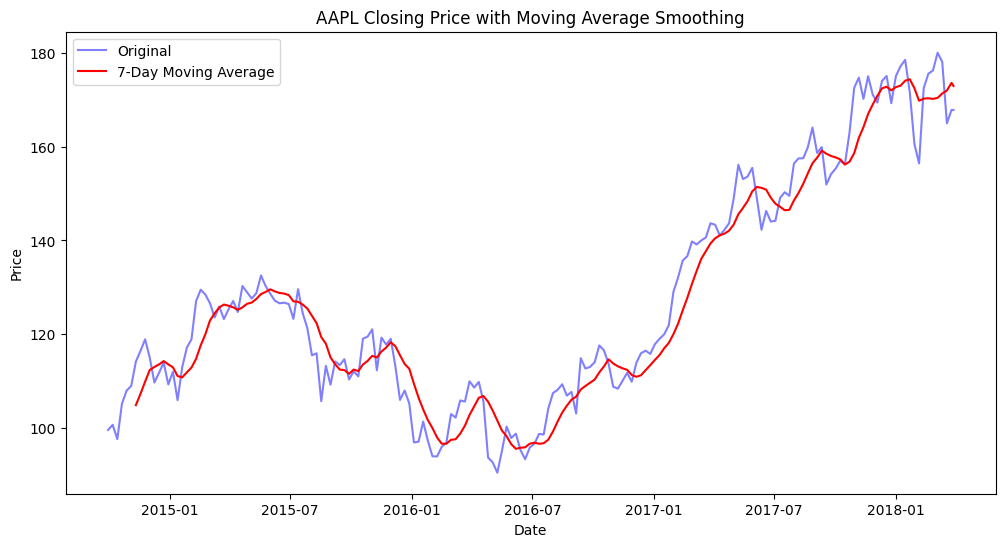

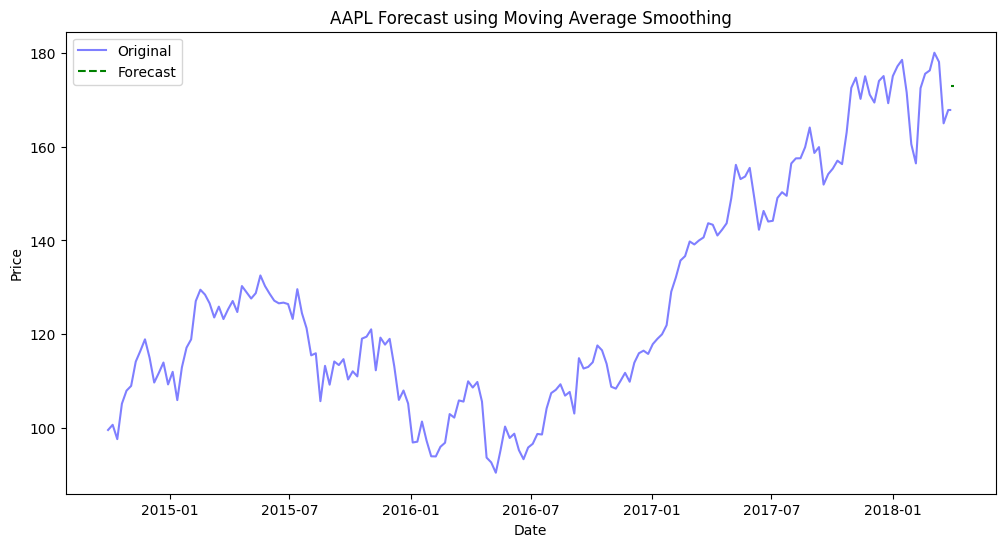

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/AAPL.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Convert 'Date' to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Use the 'Close' price
ts = data['Close']

# Apply Moving Average Smoothing (e.g., 7-day window)
window_size = 7
smoothed_ts = ts.rolling(window=window_size).mean()

# Plot original vs smoothed series
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original', color='blue', alpha=0.5)
plt.plot(smoothed_ts, label=f'{window_size}-Day Moving Average', color='red')
plt.title('AAPL Closing Price with Moving Average Smoothing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Simple Forecasting: Use the last smoothed value to forecast next n days
forecast_days = 5
last_smoothed_value = smoothed_ts.dropna().iloc[-1]
forecast_values = [last_smoothed_value] * forecast_days
forecast_dates = pd.date_range(start=ts.index[-1] + pd.Timedelta(days=1), periods=forecast_days)

# Create forecast DataFrame
forecast_df = pd.DataFrame({'Forecast': forecast_values}, index=forecast_dates)

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original', color='blue', alpha=0.5)
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='green', linestyle='dashed')
plt.title('AAPL Forecast using Moving Average Smoothing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
